In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('Cardio_Vasc_Diseases_dataset.xlsx')

# 1. Preliminary analysis:

Preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [ ]:
df.shape

(303, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Remove duplicates (if any) and treat missing values using an appropriate strategy

In [ ]:
#Find missing/null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# This result is misleading. 
#For attribute 'thal', the document defines 3 categories; but the dataset has 4 categories (0, 1, 2, and 3). 
# Therefore, the following assumption is made: 
#     0 is for null 
#     1 is for 3 = normal 
#     2 is for 6 = fixed defect 
#     3 is for 7 = reversible defect

In [ ]:
#Drop rows where 'thal' has value 0
df = df[df['thal'] != 0]
df.shape

(301, 14)

In [ ]:
#2 rows dropped
#Check for duplicates
df.duplicated().sum()

1

In [ ]:
#1 duplicate found.
#Drop the duplicate
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
#Re-Index the dataframe
df = df.reindex()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#Show correlations between attributes of the dataframe
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.095553,-0.063621,0.282915,0.206558,0.122627,-0.111667,-0.397405,0.094540,0.205844,-0.164588,0.301811,0.063048,-0.222752
sex,-0.095553,1.000000,-0.045082,-0.058444,-0.197782,0.039160,-0.067750,-0.054871,0.138020,0.094571,-0.026954,0.111871,0.212873,-0.278841
cp,-0.063621,-0.045082,1.000000,0.046687,-0.073617,0.106182,0.047987,0.301398,-0.389029,-0.144456,0.112198,-0.196135,-0.168199,0.428426
trestbps,0.282915,-0.058444,0.046687,1.000000,0.124519,0.181279,-0.115801,-0.049065,0.069331,0.194248,-0.122942,0.098451,0.060662,-0.146902
chol,0.206558,-0.197782,-0.073617,0.124519,1.000000,0.017350,-0.147805,-0.007559,0.067042,0.048360,0.000580,0.083797,0.083201,-0.083037
fbs,0.122627,0.039160,0.106182,0.181279,0.017350,1.000000,-0.092791,-0.011622,0.012590,0.003622,-0.052831,0.151374,-0.008389,-0.017150
restecg,-0.111667,-0.067750,0.047987,-0.115801,-0.147805,-0.092791,1.000000,0.035597,-0.075947,-0.059386,0.096091,-0.083748,-0.012386,0.142079
thalach,-0.397405,-0.054871,0.301398,-0.049065,-0.007559,-0.011622,0.035597,1.000000,-0.385364,-0.348520,0.392700,-0.232553,-0.116556,0.428683
exang,0.094540,0.138020,-0.389029,0.069331,0.067042,0.012590,-0.075947,-0.385364,1.000000,0.286461,-0.252419,0.127881,0.227082,-0.431575
oldpeak,0.205844,0.094571,-0.144456,0.194248,0.048360,0.003622,-0.059386,-0.348520,0.286461,1.000000,-0.575560,0.235045,0.207699,-0.428568


# 2. Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

Preliminary statistical summary of the data, measures of central tendencies, and spread of the data

In [ ]:
#Describe the dataframe
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,54.433333,0.683333,0.963333,131.626667,246.743333,0.146667,0.526667,149.663333,0.326667,1.046667,1.396667,0.723333,2.330000,0.543333
std,9.076720,0.465953,1.032250,17.619557,51.837514,0.354364,0.526192,22.889658,0.469778,1.163760,0.616920,1.008387,0.585014,0.498951
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#The above output treats categorical variable as numerical so the statistical summary for categoricals is not clear
#In order to improve interpretation, we will detect categorical variables by assuming that any columns with less than
#10 unique values is categorical
categorical=[]
def filter_cat(cat):
    for i in cat:
        if df[i].nunique() < 10:            
            categorical.append(i)

filter_cat(df.columns)
categorical

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
#Assign meaningful values to categorical columns
df.loc[df['sex'] == 0, 'sex'] = 'female'
df.loc[df['sex'] == 1, 'sex'] = 'male'

df.loc[df['cp'] == 0, 'cp'] = 'cp0'
df.loc[df['cp'] == 1, 'cp'] = 'cp1'
df.loc[df['cp'] == 2, 'cp'] = 'cp2'
df.loc[df['cp'] == 3, 'cp'] = 'cp3'

df.loc[df['fbs'] == 0, 'fbs'] = 'fbs<120mg/ml'
df.loc[df['fbs'] == 1, 'fbs'] = 'fbs>120mg/ml'

df.loc[df['restecg'] == 0, 'restecg'] = 'restecg0'
df.loc[df['restecg'] == 1, 'restecg'] = 'restecg1'
df.loc[df['restecg'] == 2, 'restecg'] = 'restecg2'

df.loc[df['exang'] == 0, 'exang'] = 'no'
df.loc[df['exang'] == 1, 'exang'] = 'yes'

df.loc[df['slope'] == 0, 'slope'] = 'slope0'
df.loc[df['slope'] == 1, 'slope'] = 'slope1'
df.loc[df['slope'] == 2, 'slope'] = 'slope2'

df.loc[df['ca'] == 0, 'ca'] = 'ca0'
df.loc[df['ca'] == 1, 'ca'] = 'ca1'
df.loc[df['ca'] == 2, 'ca'] = 'ca2'
df.loc[df['ca'] == 3, 'ca'] = 'ca3'
df.loc[df['ca'] == 4, 'ca'] = 'ca4'

df.loc[df['thal'] == 1, 'thal'] = 'normal'
df.loc[df['thal'] == 2, 'thal'] = 'fixed defect'
df.loc[df['thal'] == 3, 'thal'] = 'reversable defect'
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [ ]:
#First, we get statistcal summary of only numerical variables
df.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,54.433333,131.626667,246.743333,149.663333,1.046667,0.543333
std,9.076720,17.619557,51.837514,22.889658,1.163760,0.498951
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.750000,120.000000,211.000000,133.750000,0.000000,0.000000
50%,56.000000,130.000000,241.500000,152.500000,0.800000,1.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [ ]:
#Then we get statistical summary of only categorical variables
df.describe(include=['O'])

,sex,cp,fbs,restecg,exang,slope,ca,thal
count,300,300,300,300,300,300,300,300
unique,2,4,2,3,2,3,5,3
top,male,cp0,fbs<120mg/ml,restecg1,no,slope2,ca0,fixed defect
freq,205,142,256,150,202,140,173,165


Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [ ]:
# Get categorical columns
df_cat = df.select_dtypes(include ='O')
df_cat.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')

In [ ]:
# Compute simple cross tabulation of each categorical attribute with target
for col in df_cat.columns:
    print(pd.crosstab(df.target, df[col]))
    print('')

sex     female  male
target              
0           24   113
1           71    92

cp      cp0  cp1  cp2  cp3
target                    
0       103    9   18    7
1        39   41   67   16

fbs     fbs<120mg/ml  fbs>120mg/ml
target                            
0                116            21
1                140            23

restecg  restecg0  restecg1  restecg2
target                               
0              79        55         3
1              67        95         1

exang    no  yes
target          
0        62   75
1       140   23

slope   slope0  slope1  slope2
target                        
0           12      90      35
1            9      49     105

ca      ca0  ca1  ca2  ca3  ca4
target                         
0        44   44   31   17    1
1       129   21    7    3    3

thal    fixed defect  normal  reversable defect
target                                         
0                 36      12                 89
1                129       6                 

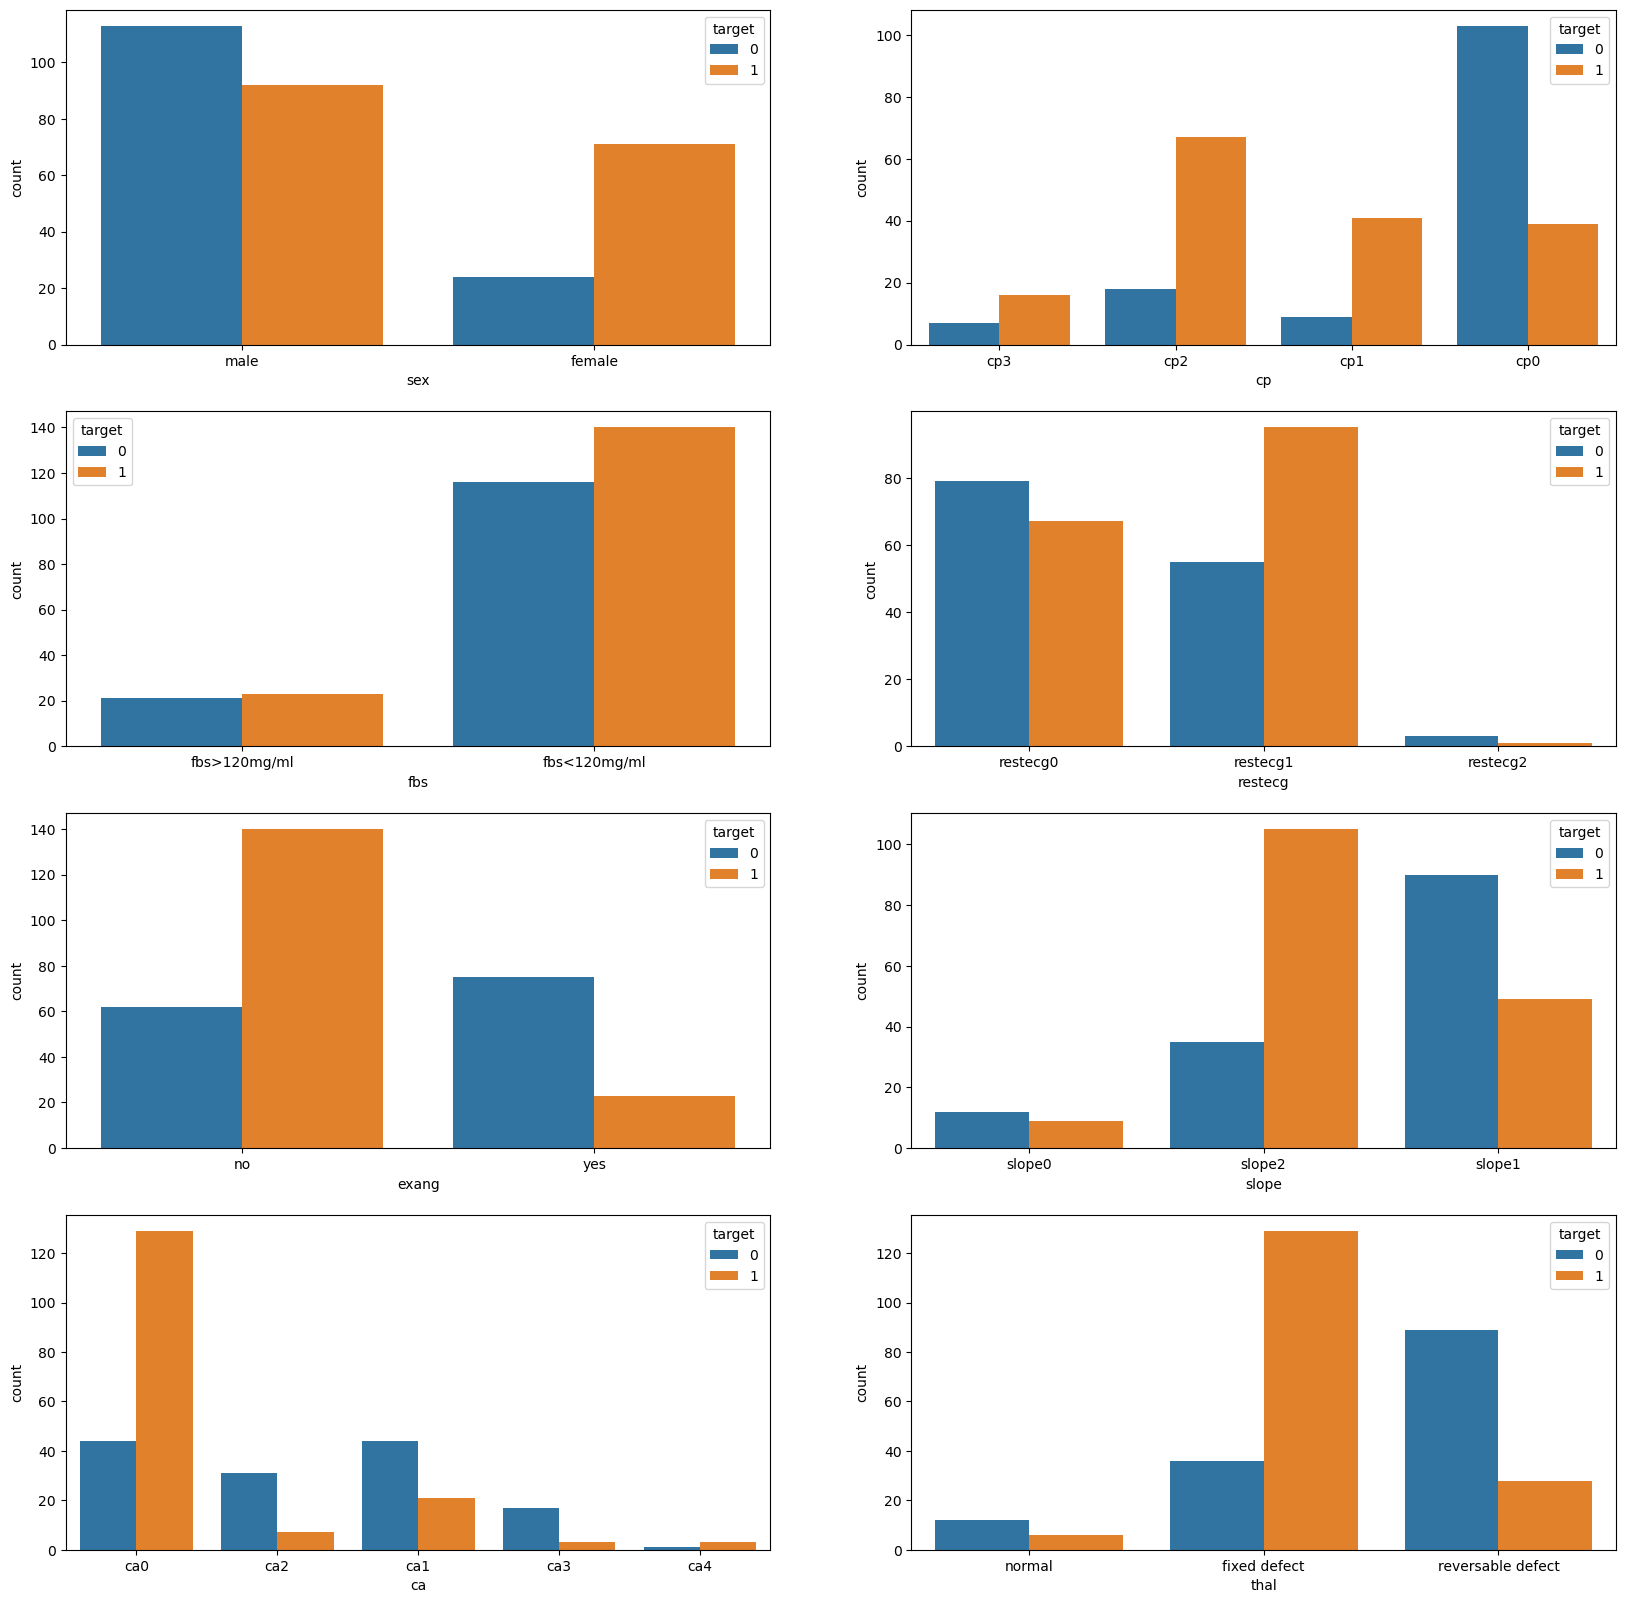

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(20,20))

for i in enumerate(df_cat.columns):  
    plt.subplot(4,2,i[0]+1)    
    sns.countplot(df[i[1]], hue=df.target)
plt.show()

Occurrence of CVD across the Age category

<AxesSubplot:xlabel='age', ylabel='count'>

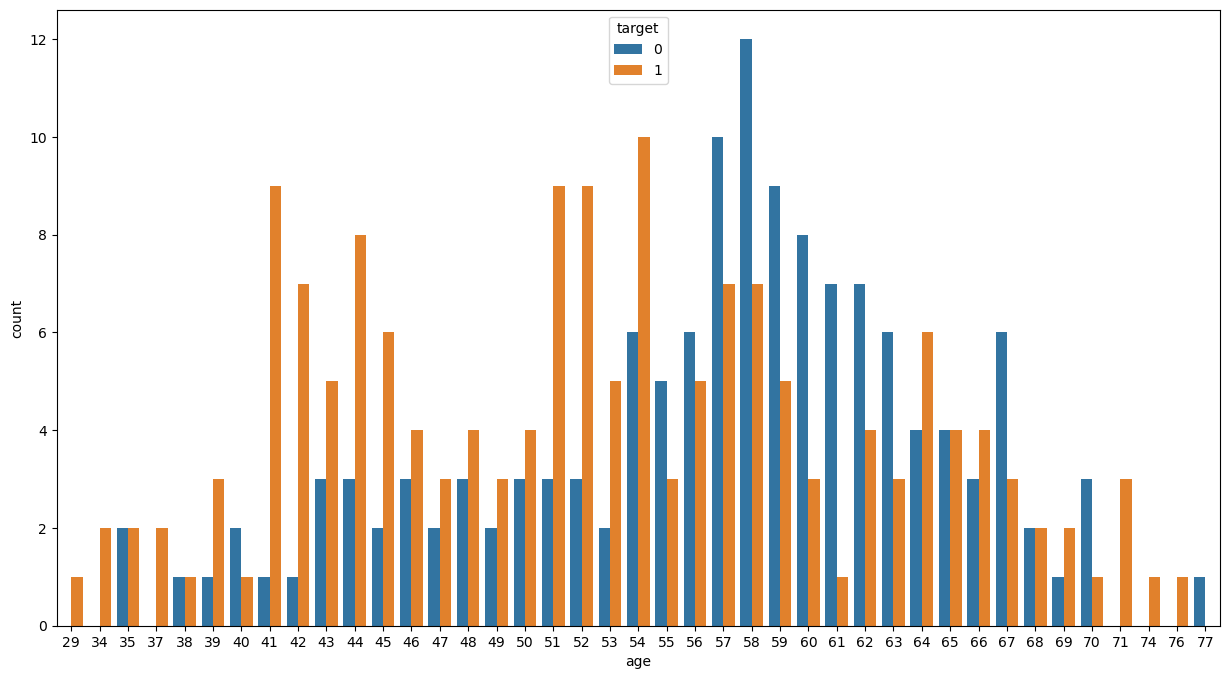

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['age'], hue=df.target)

<AxesSubplot:xlabel='age', ylabel='Count'>

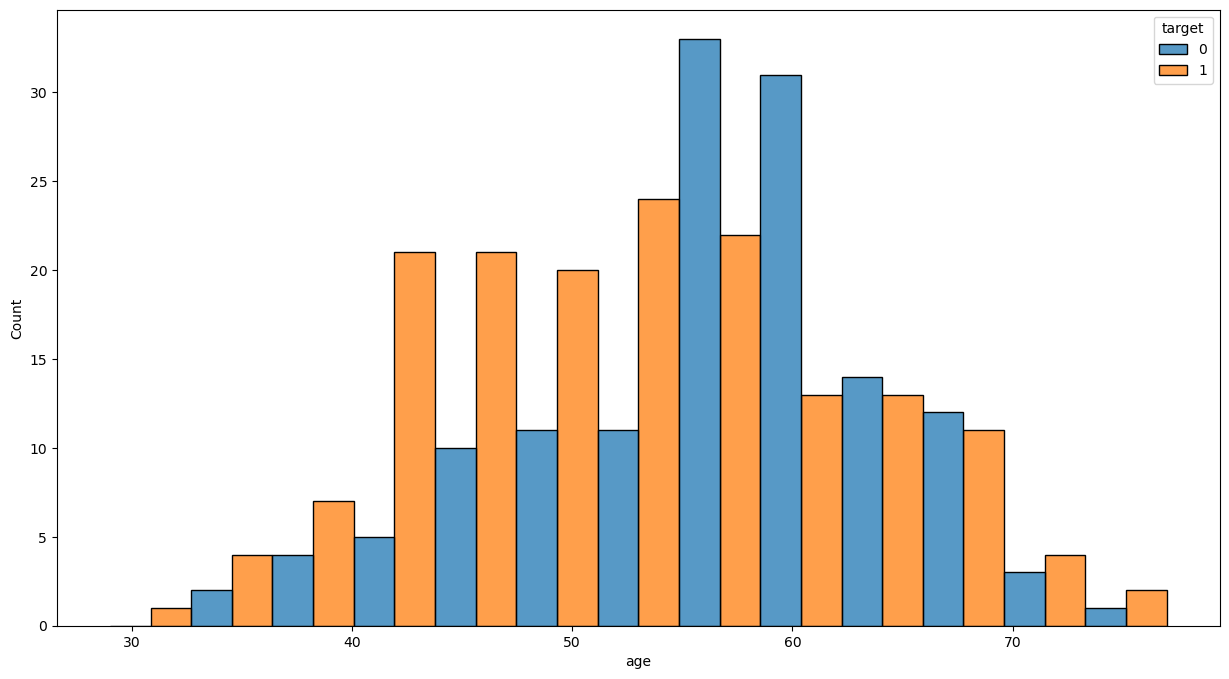

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data = df, x = 'age', hue = 'target', multiple='dodge')

<AxesSubplot:title={'center':'age'}, xlabel='target'>

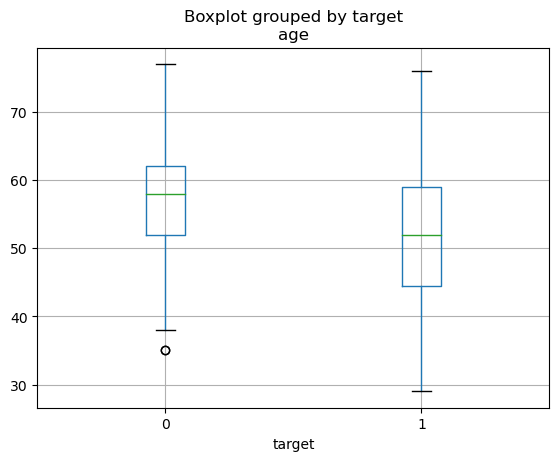

In [ ]:
df.boxplot(column='age', by='target')

<AxesSubplot:xlabel='age', ylabel='Density'>

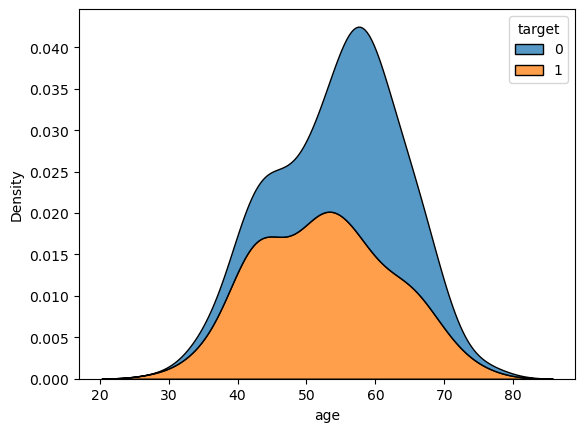

In [ ]:
sns.kdeplot(df['age'], hue=df.target, multiple='stack')

In [ ]:
df[['age','target']].groupby(['target']).mean()

,age
target,
0,56.635036
1,52.582822


Composition of all patients with respect to the Sex category

<AxesSubplot:xlabel='sex', ylabel='count'>

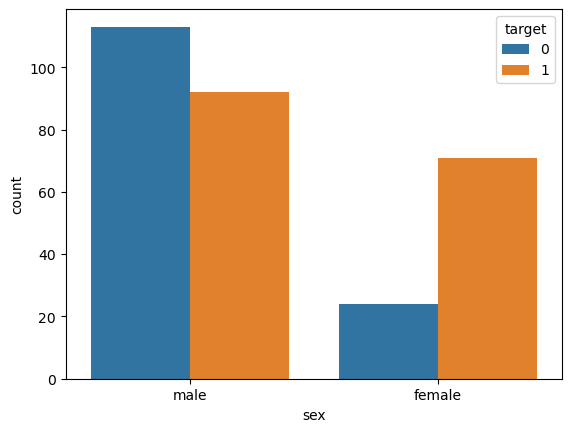

In [ ]:
sns.countplot(df.sex, hue=df.target)

In [ ]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
female,24,71
male,113,92


Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

<AxesSubplot:xlabel='trestbps', ylabel='count'>

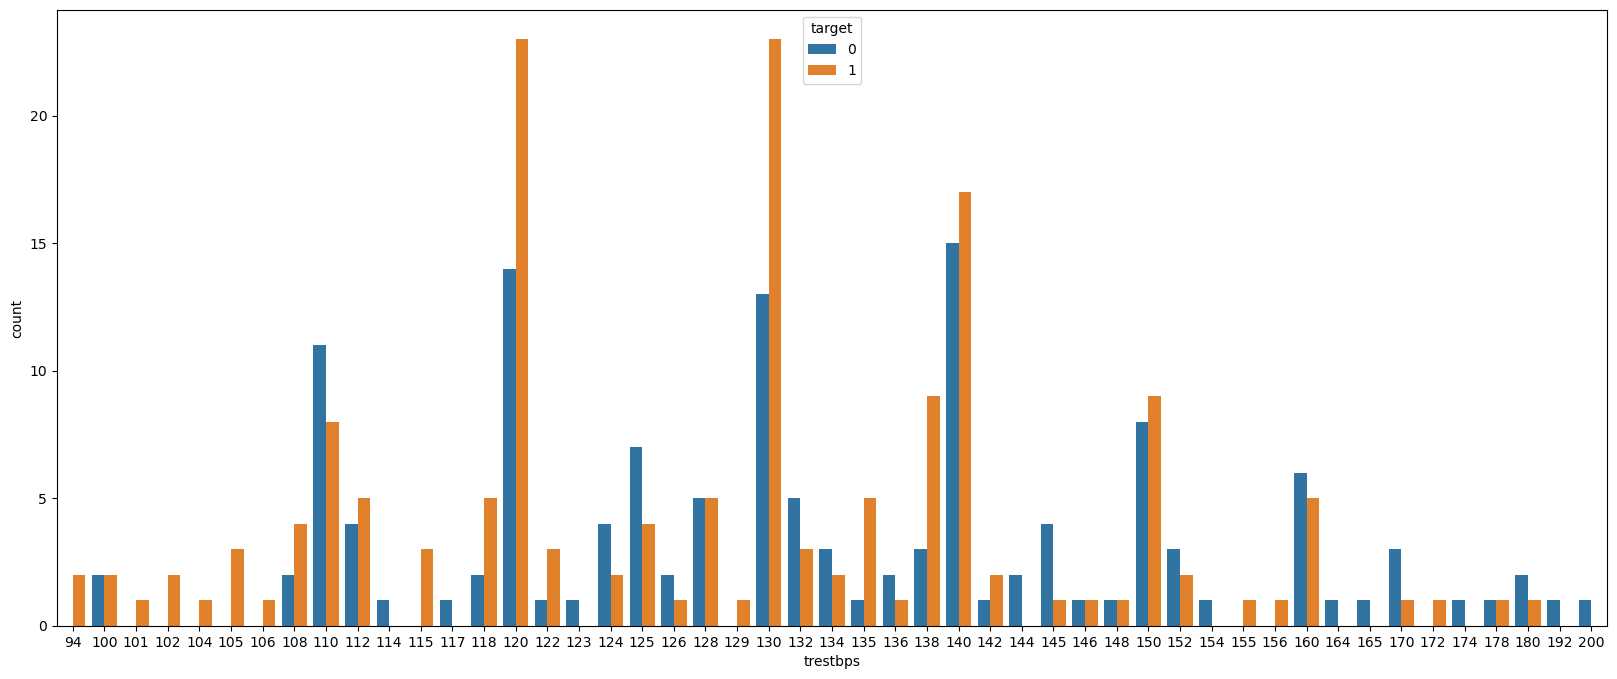

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(df['trestbps'], hue=df.target)

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

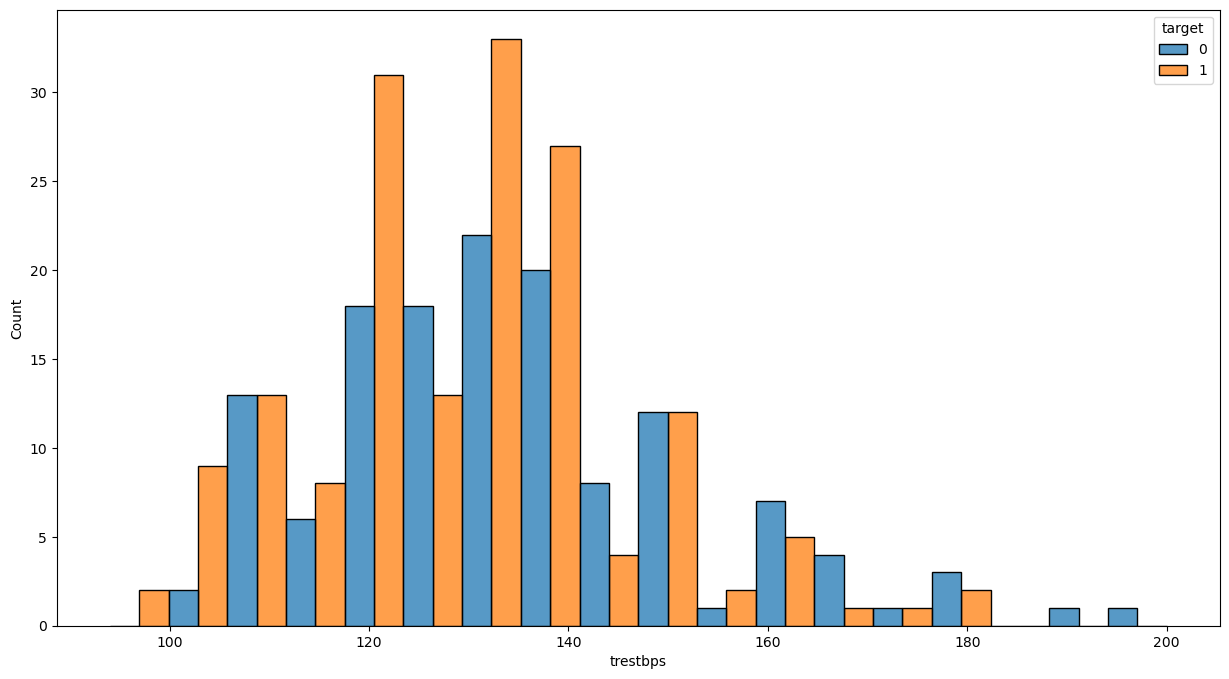

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data = df, x = 'trestbps', hue = 'target', multiple='dodge')

Text(0, 0.5, 'Resting blood pressure')

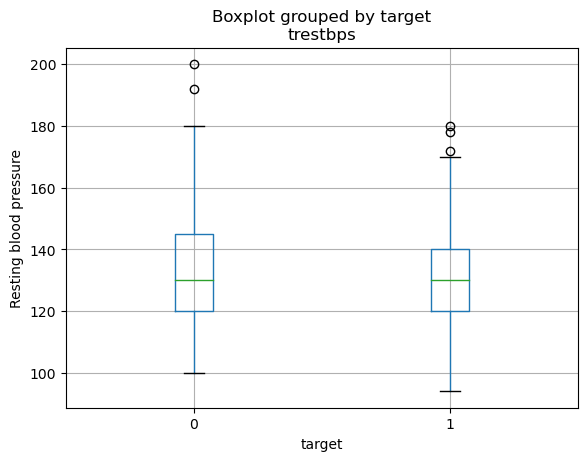

In [ ]:
df.boxplot(column='trestbps', by='target').set_ylabel('Resting blood pressure')

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

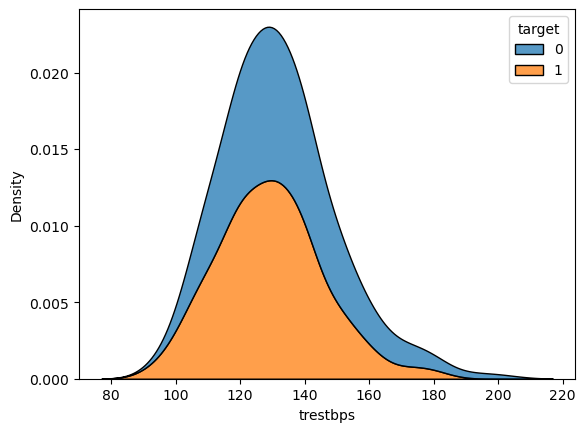

In [ ]:
sns.kdeplot(df['trestbps'], hue=df.target, multiple='stack')

In [ ]:
df[['trestbps','target']].groupby(['target']).mean()

,trestbps
target,
0,134.445255
1,129.257669


In [ ]:
df[['trestbps','target']].groupby(['target']).std()

,trestbps
target,
0,18.790611
1,16.254378


In [ ]:
df[['trestbps','target']].groupby(['target']).var()

,trestbps
target,
0,353.087055
1,264.204802


In [ ]:
group0 = df['trestbps'][df.target==0]
group1 = df['trestbps'][df.target==1]
df[['trestbps','target']].groupby(['target']).var().max() / df[['trestbps','target']].groupby(['target']).var().min()

trestbps    1.336414
dtype: float64

In [ ]:
#The ratio of the larger sample variance to the smaller sample variance is 1.336414, which is less than 4. 
#This means we can assume that the population variances are equal
#we can proceed to perform the two sample t-test with equal variances
#H0: µ1 = µ2 (the two population means are equal)
#H1: µ1 ≠ µ2 (the two population means are not equal)

import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=group0, b=group1, equal_var=True)

Ttest_indResult(statistic=2.563738838773305, pvalue=0.010845607152977579)

In [ ]:
#Because the p-value of our test (0.01) is less than alpha = 0.05, we reject the null hypothesis of the test. 
#The Resting Blood Pressure has an effect on CVD

Describe the relationship between cholesterol levels and a target variable

Text(0, 0.5, 'Serum cholesterol in mg/dl')

<Figure size 2000x800 with 0 Axes>

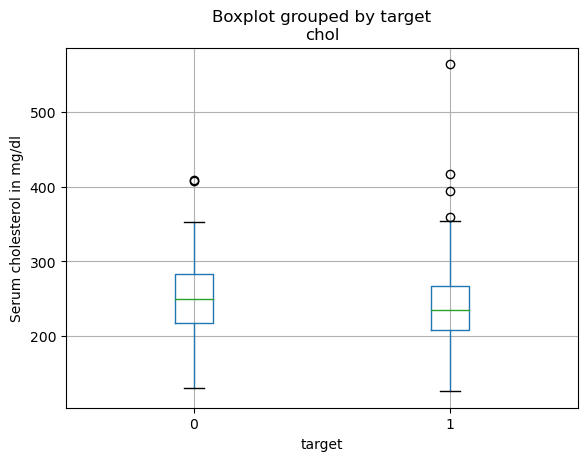

In [ ]:
plt.figure(figsize=(20,8))
df.boxplot(column='chol', by='target').set_ylabel('Serum cholesterol in mg/dl')

In [ ]:
df[['chol','target']].groupby(['target']).mean()

,chol
target,
0,251.430657
1,242.803681


In [ ]:
group0 = df['chol'][df.target==0]
group1 = df['chol'][df.target==1]
df[['chol','target']].groupby(['target']).var().max() / df[['chol','target']].groupby(['target']).var().min()

chol    1.173053
dtype: float64

In [ ]:
#perform two sample t-test with equal variances
stats.ttest_ind(a=group0, b=group1, equal_var=True)

Ttest_indResult(statistic=1.4384105763157073, pvalue=0.1513669719043815)

In [ ]:
#Because the p-value of our test (0.15) is greater than alpha = 0.05, we fail to reject the null hypothesis. 
#The cholesterol level has no effect on CVD

What relationship exists between peak exercising and the occurrence of a heart attack

Text(0, 0.5, 'ST depression induced by exercise')

<Figure size 2000x800 with 0 Axes>

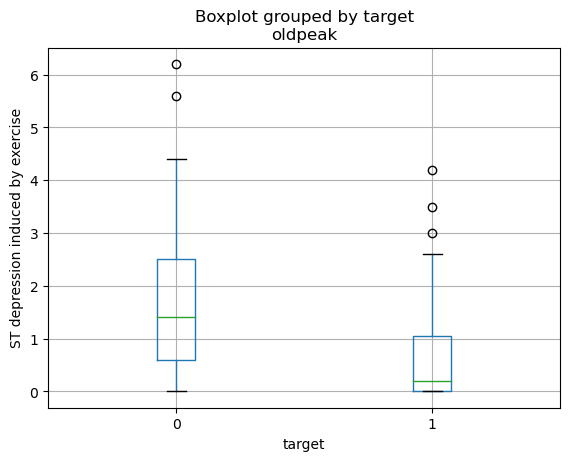

In [ ]:
plt.figure(figsize=(20,8))
df.boxplot(column='oldpeak', by='target').set_ylabel('ST depression induced by exercise')

In [ ]:
df[['oldpeak','target']].groupby(['target']).mean()

,oldpeak
target,
0,1.589781
1,0.590184


In [ ]:
group0 = df['oldpeak'][df.target==0]
group1 = df['oldpeak'][df.target==1]
df[['oldpeak','target']].groupby(['target']).var().max() / df[['oldpeak','target']].groupby(['target']).var().min()

oldpeak    2.77568
dtype: float64

In [ ]:
#perform two sample t-test with equal variances
stats.ttest_ind(a=group0, b=group1, equal_var=True)

Ttest_indResult(statistic=8.188320097511168, pvalue=7.838056028397738e-15)

In [ ]:
#Because the p-value of our test (7.838056028397738e-15) is less than alpha = 0.05, we reject the null hypothesis. 
#Peak exercising has an effect on the occurrence of heart attack

Check if thalassemia is a major cause of CVD

<AxesSubplot:xlabel='thal', ylabel='count'>

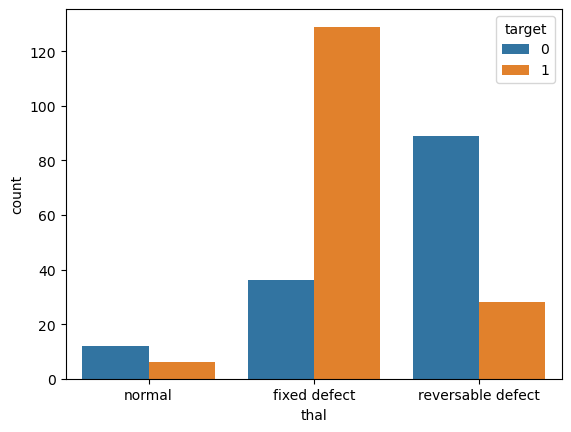

In [ ]:
sns.countplot(df.thal, hue=df.target)

In [ ]:
thal_contengency = pd.crosstab(df.target, df.thal)
thal_contengency

thal,fixed defect,normal,reversable defect
target,,,
0,36,12,89
1,129,6,28


In [ ]:
#Perform the Chi-Square Test of Independence between 'thal' and 'target'
#H0: (null hypothesis) The two variables are independent.
#H1: (alternative hypothesis) The two variables are not independent.

stats.chi2_contingency(thal_contengency)

(84.60373534485754,
 4.251403205561942e-19,
 2,
 array([[75.35,  8.22, 53.43],
        [89.65,  9.78, 63.57]]))

In [ ]:
#The p-value (4.251403205561942e-19)) is less than alpha = 0.05, we reject the null hypothesis. 
#Thalassemia is a major cause of CVD

List how the other factors determine the occurrence of CVD

In [ ]:
#We will use the Chi-Square test of independence for discrete variables and student t-test for continuous variables

In [ ]:
#Chest pain type
cp_contengency = pd.crosstab(df.target, df.cp)
temp = stats.chi2_contingency(cp_contengency)
print('Chest pain type Chi-Square results:')
print('p-value = ', temp[1], ' < 0.05' if temp[1] < 0.05 else ' >= 0.05')
if temp[1] < 0.05:
    print('Chest pain types does not determine the occurrence of CVD')
else:
    print('Chest pain types determine the occurrence of CVD')

#Fasting blood sugar 
fbs_contengency = pd.crosstab(df.target, df.fbs)
temp = stats.chi2_contingency(fbs_contengency)
print('')
print('Fasting blood sugar Chi-Square results:')
print('p-value = ', temp[1], ' < 0.05' if temp[1] < 0.05 else ' >= 0.05')
if temp[1] < 0.05:
    print('Fasting blood sugar does not determine the occurrence of CVD')
else:
    print('Fasting blood sugar determines the occurrence of CVD')

#Resting electrocardiographic results
restecg_contengency = pd.crosstab(df.target, df.restecg)
temp = stats.chi2_contingency(restecg_contengency)
print('')
print('Resting electrocardiographic results:')
print('p-value = ', temp[1], ' < 0.05' if temp[1] < 0.05 else ' >= 0.05')
if temp[1] < 0.05:
    print('Resting electrocardiographic does not determine the occurrence of CVD')
else:
    print('Resting electrocardiographic determines the occurrence of CVD')

#Maximum heart rate achieved
group0 = df['thalach'][df.target==0]
group1 = df['thalach'][df.target==1]
temp = stats.ttest_ind(a=group0, b=group1, equal_var=True)
print('')
print('Maximum heart rate achieved results:')
print('p-value = ', temp[1], ' < 0.05' if temp[1] < 0.05 else ' >= 0.05')
if temp[1] < 0.05:
    print('Maximum heart rate achieved does not determine the occurrence of CVD')
else:
    print('Maximum heart rate achieved determines the occurrence of CVD')

#Exercise induced angina
exang_contengency = pd.crosstab(df.target, df.exang)
temp = stats.chi2_contingency(exang_contengency)
print('')
print('Exercise induced angina results:')
print('p-value = ', temp[1], ' < 0.05' if temp[1] < 0.05 else ' >= 0.05')
if temp[1] < 0.05:
    print('Exercise induced angina does not determine the occurrence of CVD')
else:
    print('Exercise induced angina determines the occurrence of CVD')

#Slope of the peak exercise ST segment
slope_contengency = pd.crosstab(df.target, df.slope)
temp = stats.chi2_contingency(slope_contengency)
print('')
print('Slope of the peak exercise ST segment results:')
print('p-value = ', temp[1], ' < 0.05' if temp[1] < 0.05 else ' >= 0.05')
if temp[1] < 0.05:
    print('Slope of the peak exercise ST segment does not determine the occurrence of CVD')
else:
    print('Slope of the peak exercise ST segment determines the occurrence of CVD')

#Number of major vessels colored by fluoroscopy
ca_contengency = pd.crosstab(df.target, df.ca)
temp = stats.chi2_contingency(ca_contengency)
print('')
print('Number of major vessels colored by fluoroscopy:')
print('p-value = ', temp[1], ' < 0.05' if temp[1] < 0.05 else ' >= 0.05')
if temp[1] < 0.05:
    print('Number of major vessels does not determine the occurrence of CVD')
else:
    print('Number of major vessels determines the occurrence of CVD')

Chest pain type Chi-Square results:
p-value =  4.0527647609253594e-17  < 0.05
Chest pain types does not determine the occurrence of CVD

Fasting blood sugar Chi-Square results:
p-value =  0.8940071130551489  >= 0.05
Fasting blood sugar determines the occurrence of CVD

Resting electrocardiographic results:
p-value =  0.005304661404941871  < 0.05
Resting electrocardiographic does not determine the occurrence of CVD

Maximum heart rate achieved results:
p-value =  7.696114198222922e-15  < 0.05
Maximum heart rate achieved does not determine the occurrence of CVD

Exercise induced angina results:
p-value =  1.9595954022214564e-13  < 0.05
Exercise induced angina does not determine the occurrence of CVD

Slope of the peak exercise ST segment results:
p-value =  1.246292711664596e-10  < 0.05
Slope of the peak exercise ST segment does not determine the occurrence of CVD

Number of major vessels colored by fluoroscopy:
p-value =  2.995071420280647e-15  < 0.05
Number of major vessels does not de

Use a pair plot to understand the relationship between all the given variables

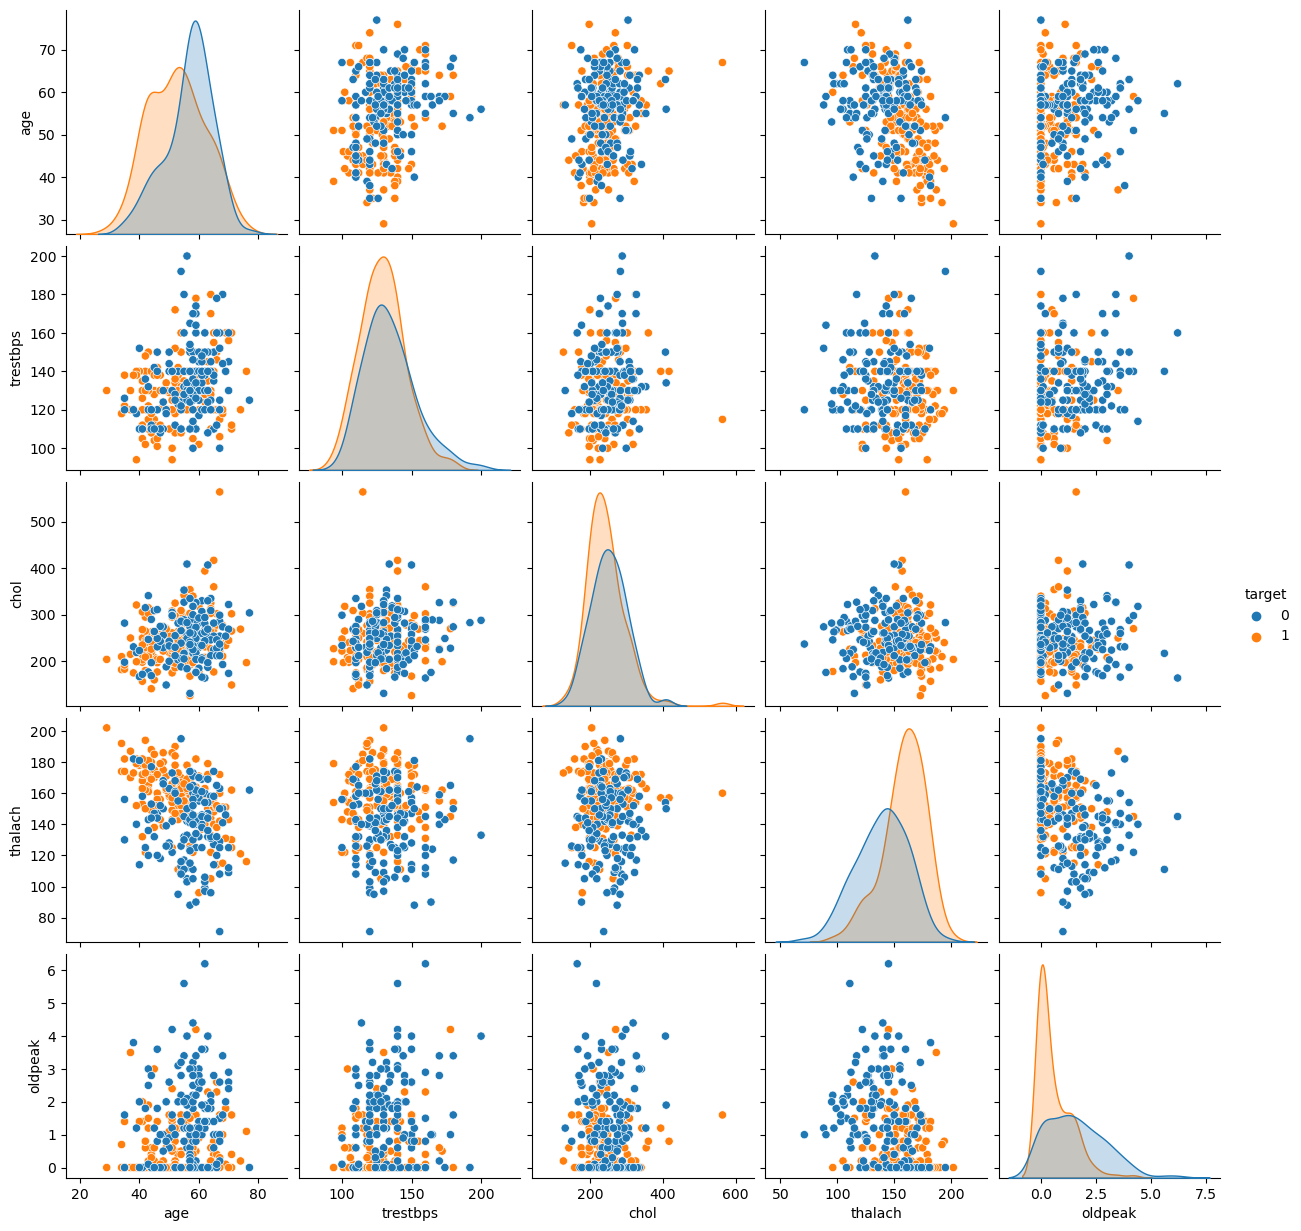

In [ ]:
sns.pairplot(df, hue='target')

In [ ]:
#From the pair plot it can be concluded that the relationship between the variables is little

# 3. Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [ ]:
#df['target'][df.target==0].value_counts()
cvd = df[df["target"] == 1]["target"].value_counts()[1]
no_cvd = df[df["target"] == 0]["target"].value_counts()[0]
print('Patients with CVD disease: ', cvd)
print('Patients with NO CVD disease: ', no_cvd)

Patients with CVD disease:  163
Patients with NO CVD disease:  137


In [ ]:
df_final = pd.get_dummies(df, drop_first='True')
df_final.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_male,cp_cp1,cp_cp2,cp_cp3,...,restecg_restecg2,exang_yes,slope_slope1,slope_slope2,ca_ca1,ca_ca2,ca_ca3,ca_ca4,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,57,120,354,163,0.6,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
df_final.shape

(300, 22)

In [ ]:
X = df_final.drop(['target'], axis=1)
y = df_final[['target']]

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (240, 21)
X_test shape: (60, 21)
y_train shape: (240, 1)
y_test shape: (60, 1)


<u>__Logistic Regression Classification__</u>

In [ ]:
logistic_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.286258
         Iterations 8


In [ ]:
y_pred_lr = pd.DataFrame(logistic_reg.predict(X_test), columns=["target_pred"])
y_pred_lr["target_pred"] = y_pred_lr.target_pred.apply(lambda x: 0 if x < 0.5  else 1)

y_pred_lr_df = pd.DataFrame({'Expected':y_test.target.values, 'Predicted':y_pred_lr.target_pred.values})
y_pred_lr_df.head(10)

,Expected,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,0,1
9,0,0


In [ ]:
#Making the Confusion Matrix
lr_cm = confusion_matrix(y_test, y_pred_lr)
print('Confusion matrix test and prediction data for logistic regression:')
lr_cm

Confusion matrix test and prediction data for logistic regression:


array([[29,  3],
       [ 4, 24]], dtype=int64)

In [ ]:
#Classification report for logistic regression
lr_cr = classification_report(y_test, y_pred_lr)
print('Classification Report for logistic regression:\n')
print(lr_cr)

Classification Report for logistic regression:

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [ ]:
logistic_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  240
Model:                          Logit   Df Residuals:                      219
Method:                           MLE   Df Model:                           20
Date:                Sun, 26 Feb 2023   Pseudo R-squ.:                  0.5823
Time:                        09:25:36   Log-Likelihood:                -68.702
converged:                       True   LL-Null:                       -164.48
Covariance Type:            nonrobust   LLR p-value:                 5.247e-30
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
age                        0.0368      0.025      1.472      0.141      -0.012       0.086
trestbps                  -0.0321      0.013     -2.397      0.017      -0.058      -0.006
chol                      -0.0053      0.005     -1.134      0.257      -0.014       0.004
thalach                    0.0367      0.012      3.126      0.002       0.014       0.060
oldpeak                   -0.4478      0.273     -1.641      0.101      -0.983       0.087
sex_male                  -2.0428      0.681     -2.998      0.003      -3.378      -0.707
cp_cp1                     0.9344      0.690      1.355      0.175      -0.417       2.286
cp_cp2                     1.9416      0.617      3.146      0.002       0.732       3.151
cp_cp3                     1.9442      0.801      2.427      0.015       0.374       3.514
fbs_fbs>120mg/ml           0.9230      0.679      1.359      0.174      -0.408       2.254
restecg_restecg1           0.3685      0.453      0.814      0.416      -0.519       1.256
restecg_restecg2          -0.0933      3.149     -0.030      0.976      -6.265       6.079
exang_yes                 -0.6961      0.532     -1.308      0.191      -1.739       0.347
slope_slope1              -0.0400      0.907     -0.044      0.965      -1.817       1.737
slope_slope2               1.4836      0.989      1.500      0.134      -0.455       3.422
ca_ca1                    -2.4997      0.612     -4.083      0.000      -3.700      -1.300
ca_ca2                    -3.5476      1.025     -3.460      0.001      -5.557      -1.538
ca_ca3                    -2.1962      1.050     -2.091      0.037      -4.255      -0.137
ca_ca4                     1.2169      1.690      0.720      0.471      -2.095       4.529
thal_normal                0.7972      0.928      0.859      0.390      -1.021       2.616
thal_reversable defect    -1.5303      0.517     -2.960      0.003      -2.543      -0.517
==========================================================================================
"""

In [ ]:
logistic_reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Pseudo R-squared:  0.582     
Dependent Variable:    target            AIC:               179.4038  
Date:                  2023-02-26 09:25  BIC:               252.4972  
No. Observations:      240               Log-Likelihood:    -68.702   
Df Model:              20                LL-Null:           -164.48   
Df Residuals:          219               LLR p-value:       5.2468e-30
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        8.0000                                         
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
age                     0.0368   0.0250  1.4716 0.1411 -0.0122  0.0858
trestbps               -0.0321   0.0134 -2.3970 0.0165 -0.0584 -0.0059
chol                   -0.0053   0.0046 -1.1342 0.2567 -0.0144  0.0038
thalach                 0.0367   0.0117  3.1264 0.0018  0.0137  0.0597
oldpeak                -0.4478   0.2729 -1.6412 0.1008 -0.9827  0.0870
sex_male               -2.0428   0.6814 -2.9979 0.0027 -3.3784 -0.7073
cp_cp1                  0.9344   0.6897  1.3548 0.1755 -0.4174  2.2862
cp_cp2                  1.9416   0.6172  3.1458 0.0017  0.7319  3.1513
cp_cp3                  1.9442   0.8011  2.4269 0.0152  0.3740  3.5143
fbs_fbs>120mg/ml        0.9230   0.6792  1.3591 0.1741 -0.4081  2.2542
restecg_restecg1        0.3685   0.4529  0.8137 0.4158 -0.5191  1.2561
restecg_restecg2       -0.0933   3.1491 -0.0296 0.9764 -6.2653  6.0788
exang_yes              -0.6961   0.5323 -1.3077 0.1910 -1.7394  0.3472
slope_slope1           -0.0400   0.9066 -0.0441 0.9648 -1.8170  1.7370
slope_slope2            1.4836   0.9890  1.5000 0.1336 -0.4549  3.4220
ca_ca1                 -2.4997   0.6123 -4.0825 0.0000 -3.6997 -1.2996
ca_ca2                 -3.5476   1.0254 -3.4597 0.0005 -5.5573 -1.5378
ca_ca3                 -2.1962   1.0505 -2.0907 0.0366 -4.2550 -0.1373
ca_ca4                  1.2169   1.6900  0.7201 0.4715 -2.0954  4.5291
thal_normal             0.7972   0.9279  0.8591 0.3903 -1.0214  2.6157
thal_reversable defect -1.5303   0.5170 -2.9601 0.0031 -2.5435 -0.5170
======================================================================

"""

<u>__Logistic Regression: Feature selection implementation__</u>

In [ ]:
#From the summary table we will retain only the features with a p-value < 0.05 that is:
#'trestbps', 'thalach', 'sex', 'cp', 'ca', 'thal'
df_final.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_male',
       'cp_cp1', 'cp_cp2', 'cp_cp3', 'fbs_fbs>120mg/ml', 'restecg_restecg1',
       'restecg_restecg2', 'exang_yes', 'slope_slope1', 'slope_slope2',
       'ca_ca1', 'ca_ca2', 'ca_ca3', 'ca_ca4', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [ ]:
df_final2 = df_final[['trestbps','thalach','sex_male','cp_cp1', 'cp_cp2', 'cp_cp3','ca_ca1', 'ca_ca2', 'ca_ca3', 'ca_ca4', 
                      'thal_normal','thal_reversable defect','target']]
X2 = df_final2.drop(['target'], axis=1)
y2 = df_final2[['target']]

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 10)

In [ ]:
print('X2_train shape:', X2_train.shape)
print('X2_test shape:', X2_test.shape)
print('y2_train shape:', y2_train.shape)
print('y2_test shape:', y2_test.shape)

X2_train shape: (240, 12)
X2_test shape: (60, 12)
y2_train shape: (240, 1)
y2_test shape: (60, 1)


In [ ]:
logistic_reg = sm.Logit(y2_train, X2_train).fit()

y2_pred_lr = pd.DataFrame(logistic_reg.predict(X2_test), columns=["target_pred"])
y2_pred_lr["target_pred"] = y2_pred_lr.target_pred.apply(lambda x: 0 if x < 0.5  else 1)

#Making the Confusion Matrix
lr_cm = confusion_matrix(y2_test, y2_pred_lr)
print('\nConfusion Matrix for logistic regression after feature selection:\n')
lr_cm

Optimization terminated successfully.
         Current function value: 0.343965
         Iterations 7

Confusion Matrix for logistic regression after feature selection:



array([[28,  4],
       [ 5, 23]], dtype=int64)

In [ ]:
#Classification report for logistic regression after feature selection
lr_cr = classification_report(y2_test, y2_pred_lr)
print('Classification Report for logistic regression after feature selection:\n')
print(lr_cr)

Classification Report for logistic regression after feature selection:

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.85      0.82      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
#The model accurary instead dropped from .88 to .85

In [ ]:
logistic_reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Pseudo R-squared:  0.498     
Dependent Variable:    target            AIC:               189.1031  
Date:                  2023-02-26 09:26  BIC:               230.8708  
No. Observations:      240               Log-Likelihood:    -82.552   
Df Model:              11                LL-Null:           -164.48   
Df Residuals:          228               LLR p-value:       2.1709e-29
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        7.0000                                         
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
trestbps               -0.0293   0.0091 -3.2357 0.0012 -0.0471 -0.0116
thalach                 0.0381   0.0087  4.3541 0.0000  0.0209  0.0552
sex_male               -1.4722   0.5404 -2.7241 0.0064 -2.5315 -0.4130
cp_cp1                  1.6140   0.6308  2.5589 0.0105  0.3778  2.8503
cp_cp2                  1.8118   0.4971  3.6446 0.0003  0.8374  2.7861
cp_cp3                  1.4807   0.6675  2.2185 0.0265  0.1725  2.7889
ca_ca1                 -1.7814   0.5047 -3.5294 0.0004 -2.7707 -0.7921
ca_ca2                 -2.5392   0.7262 -3.4964 0.0005 -3.9625 -1.1158
ca_ca3                 -1.7915   0.8653 -2.0703 0.0384 -3.4876 -0.0955
ca_ca4                  0.8175   1.5268  0.5355 0.5923 -2.1749  3.8100
thal_normal            -0.1309   0.7576 -0.1728 0.8628 -1.6158  1.3540
thal_reversable defect -1.7127   0.4582 -3.7374 0.0002 -2.6108 -0.8145
======================================================================

"""

<u>__Random Forest Classification__</u>

In [ ]:
#Create Random Forest Classification model and train the model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 21, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train )

RandomForestClassifier(criterion='entropy', n_estimators=21, random_state=0)

In [ ]:
#Predict  the test data 
y_pred_rfc = rfc.predict(X_test)

In [ ]:
#checking the performance of the model
y_pred_rfc_df = pd.DataFrame({'Expected':y_test.target.values, 'Predicted':y_pred_rfc})
y_pred_rfc_df.head(10)

,Expected,Predicted
0,1,0
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


In [ ]:
#Making the Confusion Matrix
rfc_cm = confusion_matrix(y_test.target.values, y_pred_rfc)
print('Confusion Matrix for Random Forest')
rfc_cm

Confusion Matrix for Random Forest


array([[24,  8],
       [ 4, 24]], dtype=int64)

In [ ]:
#Classification report for Random Forest Classification model
rfc_cr = classification_report(y_test, y_pred_rfc)
print('Classification Report for Random Forest Classification:\n')
print(rfc_cr)

Classification Report for Random Forest Classification:

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.75      0.86      0.80        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



<u>__Random Forest: Feature selection implementation__</u>

In [ ]:
rfc.fit(X2_train, y2_train)

RandomForestClassifier(criterion='entropy', n_estimators=21, random_state=0)

In [ ]:
#Predict  the test data 
y2_pred_rfc = rfc.predict(X2_test)

#checking the performance of the model
y2_pred_rfc_df = pd.DataFrame({'Expected':y2_test.target.values, 'Predicted':y2_pred_rfc})
y2_pred_rfc_df.head(10)

,Expected,Predicted
0,1,1
1,1,1
2,1,1
3,0,1
4,0,0
5,0,0
6,1,1
7,1,1
8,0,1
9,0,0


In [ ]:
#Making the Confusion Matrix
rfc_cm = confusion_matrix(y2_test.target.values, y2_pred_rfc)
print('\nConfusion Matrix for Random Forest after feature selection:\n')
rfc_cm


Confusion Matrix for Random Forest after feature selection:



array([[25,  7],
       [ 6, 22]], dtype=int64)

In [ ]:
#Classification report for Random Forest Classification model after feature selection
rfc_acc = classification_report(y2_test.target.values, y2_pred_rfc)
print('Classification Report for logistic regression after feature selection:\n')
print(rfc_acc)

Classification Report for logistic regression after feature selection:

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

